In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
import sys
sys.path.insert(0,'/usr/local/lib/python3.9/site-packages')
sys.path

['/usr/local/lib/python3.9/site-packages',
 '/usr/local/lib/python3.9/site-packages',
 '/usr/local/lib/python3.9/site-packages',
 'c:\\Users\\Mayuri\\Desktop\\ML\\KNN',
 'c:\\Users\\Mayuri\\anaconda3\\New folder\\python311.zip',
 'c:\\Users\\Mayuri\\anaconda3\\New folder\\DLLs',
 'c:\\Users\\Mayuri\\anaconda3\\New folder\\Lib',
 'c:\\Users\\Mayuri\\anaconda3\\New folder',
 '',
 'c:\\Users\\Mayuri\\anaconda3\\New folder\\Lib\\site-packages',
 'c:\\Users\\Mayuri\\anaconda3\\New folder\\Lib\\site-packages\\win32',
 'c:\\Users\\Mayuri\\anaconda3\\New folder\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\Mayuri\\anaconda3\\New folder\\Lib\\site-packages\\Pythonwin']

In [28]:
!pip install pydotplus


In [29]:
!pip install graphviz


In [30]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Visualization helpers
from IPython.display import Image
from six import StringIO
import pydotplus
import graphviz

import warnings
warnings.filterwarnings("ignore")


In [31]:
iris = pd.read_csv("iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [32]:
from sklearn.datasets import load_iris
iris = load_iris()


In [33]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target (class) column
df['class'] = [iris.target_names[i] for i in iris.target]

# Now you can use pandas functions
grouped = df.groupby(['class']).mean()
print(grouped)


            sepal length (cm)  sepal width (cm)  petal length (cm)  \
class                                                                
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
class                         
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


In [34]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target column
df['target'] = iris.target
df['class'] = df['target'].apply(lambda x: iris.target_names[x])

# Now you can use DataFrame methods
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   class              150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [35]:
import pandas as pd
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the class/target column
df['class'] = [iris.target_names[i] for i in iris.target]

# ✅ Now split into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']


In [36]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
10,5.4,3.7,1.5,0.2
25,5.0,3.0,1.6,0.2
13,4.3,3.0,1.1,0.1
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4


In [37]:
dt_iris = DecisionTreeClassifier()
dt_iris.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred_train = dt_iris.predict(X_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        38
  versicolor       1.00      1.00      1.00        32
   virginica       1.00      1.00      1.00        35

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [39]:
print(confusion_matrix(y_train,y_pred_train))
print(accuracy_score(y_train,y_pred_train))

[[38  0  0]
 [ 0 32  0]
 [ 0  0 35]]
1.0


In [40]:
y_pred_default = dt_iris.predict(X_test)

print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        18
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [41]:
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
0.9555555555555556


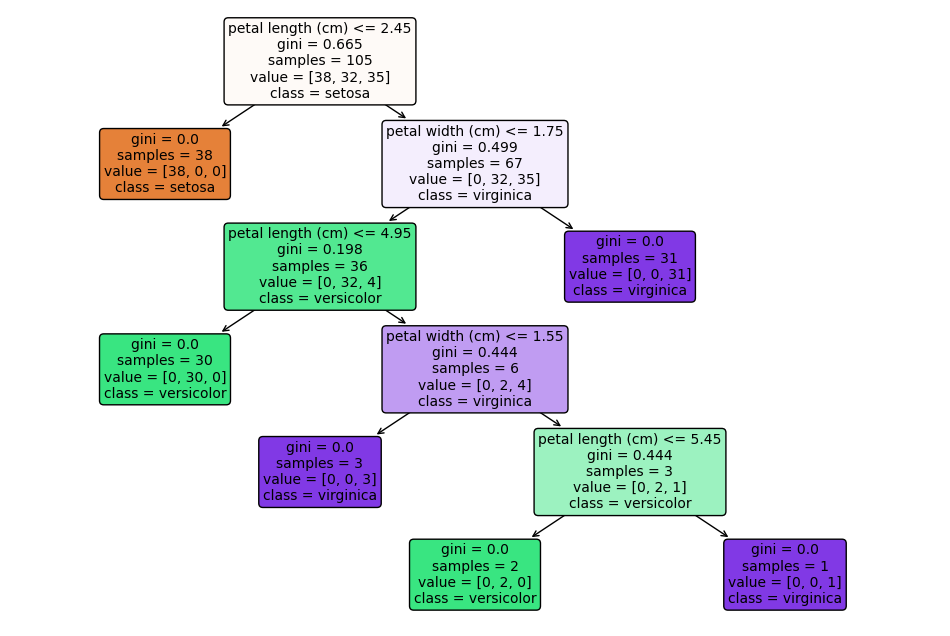

In [42]:

features = list(X_train.columns)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))
plot_tree(dt_iris,
          feature_names=features,
          class_names=dt_iris.classes_,
          filled=True, rounded=True, fontsize=10)
plt.show()


In [43]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 10)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 10)}, return_train_score=True,
             scoring='accuracy')

In [44]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001160,0.001652,0.000000,0.000000,1,{'max_depth': 1},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,9,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832
1,0.001664,0.003328,0.003142,0.003855,2,{'max_depth': 2},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,7,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
2,0.000278,0.000556,0.002607,0.005214,3,{'max_depth': 3},0.952381,1.000000,0.809524,0.952381,...,0.942857,0.069985,7,0.964286,0.976190,0.988095,0.988095,0.976190,0.978571,0.008909
3,0.000000,0.000000,0.000290,0.000580,4,{'max_depth': 4},1.000000,1.000000,0.857143,0.952381,...,0.952381,0.052164,6,0.976190,0.988095,1.000000,0.988095,1.000000,0.990476,0.008909
4,0.000472,0.000943,0.002566,0.005133,5,{'max_depth': 5},1.000000,1.000000,0.857143,1.000000,...,0.961905,0.055533,1,0.988095,1.000000,1.000000,1.000000,1.000000,0.997619,0.004762


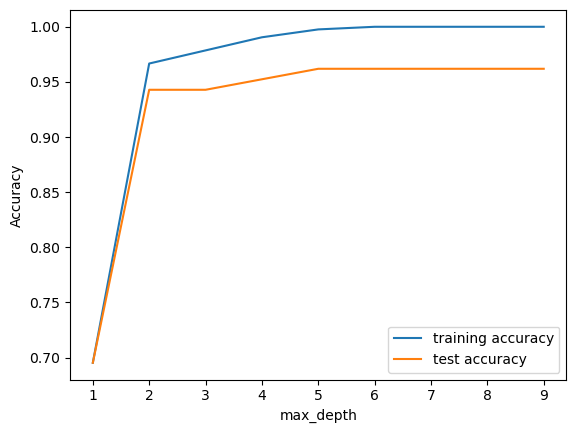

In [45]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(1, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(1, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [47]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003893,0.003972,0.0000,0.000000,1,{'min_samples_leaf': 1},1.000000,1.0,0.857143,1.000000,...,0.961905,0.055533,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.000403,0.000806,0.0000,0.000000,4,{'min_samples_leaf': 4},0.952381,1.0,0.857143,1.000000,...,0.961905,0.055533,1,0.964286,0.976190,0.988095,0.976190,0.976190,0.976190,0.007529
2,0.000331,0.000662,0.0000,0.000000,7,{'min_samples_leaf': 7},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.964286,0.988095,0.964286,0.964286,0.969048,0.009524
3,0.001336,0.002672,0.0000,0.000000,10,{'min_samples_leaf': 10},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
4,0.001778,0.003555,0.0011,0.002201,13,{'min_samples_leaf': 13},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664


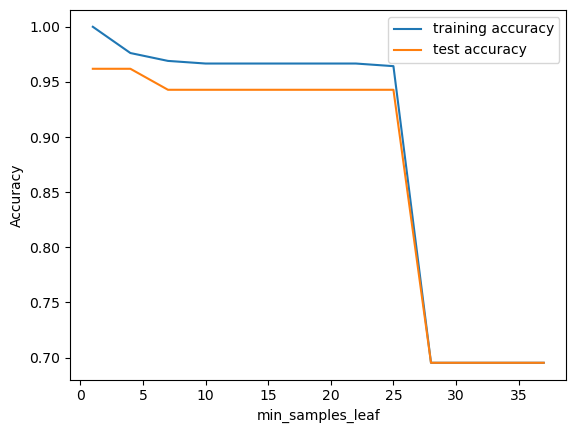

In [48]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(3, 40, 3)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(3, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [50]:
# Print the results of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002555,0.002953,0.000333,0.000666,3,{'min_samples_split': 3},1.000000,1.0,0.809524,1.000000,...,0.952381,0.073771,1,1.000000,1.000000,0.988095,1.000000,1.00000,0.997619,0.004762
1,0.001054,0.002107,0.000426,0.000851,6,{'min_samples_split': 6},1.000000,1.0,0.809524,0.952381,...,0.952381,0.073771,1,0.976190,0.988095,0.988095,0.988095,0.97619,0.983333,0.005832
2,0.001358,0.001666,0.000000,0.000000,9,{'min_samples_split': 9},0.952381,1.0,0.809524,0.952381,...,0.942857,0.069985,3,0.964286,0.976190,0.988095,0.988095,0.97619,0.978571,0.008909
3,0.000000,0.000000,0.002600,0.005200,12,{'min_samples_split': 12},0.952381,1.0,0.809524,0.952381,...,0.942857,0.069985,3,0.964286,0.976190,0.988095,0.988095,0.97619,0.978571,0.008909
4,0.000375,0.000751,0.000000,0.000000,15,{'min_samples_split': 15},0.952381,1.0,0.809524,0.952381,...,0.942857,0.069985,3,0.964286,0.976190,0.988095,0.988095,0.97619,0.978571,0.008909


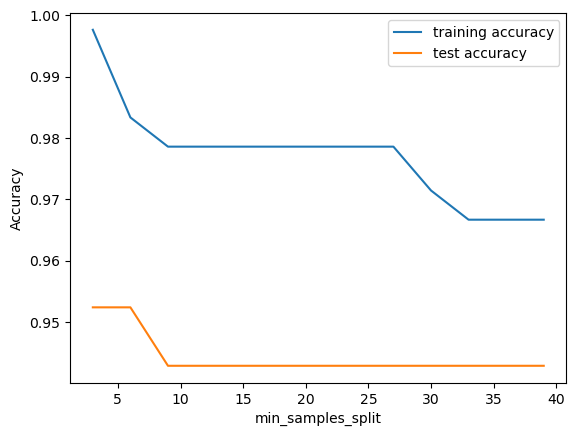

In [51]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 40, 2),
    'min_samples_split': range(2, 30, 2),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
iristree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = iristree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)


Fitting 5 folds for each of 5040 candidates, totalling 25200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 40, 2),
                         'min_samples_split': range(2, 30, 2)},
             verbose=1)

In [53]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000444,0.000544,0.001047,0.001413,entropy,1,1,2,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
1,0.002822,0.004344,0.000000,0.000000,entropy,1,1,4,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
2,0.001068,0.002135,0.001715,0.003430,entropy,1,1,6,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
3,0.001537,0.002916,0.000562,0.000713,entropy,1,1,8,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
4,0.000593,0.001186,0.000132,0.000264,entropy,1,1,10,"{'criterion': 'entropy', 'max_depth': 1, 'min_...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,0.003160,0.006321,0.000000,0.000000,gini,9,39,20,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5036,0.000000,0.000000,0.000000,0.000000,gini,9,39,22,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5037,0.000000,0.000000,0.003171,0.006342,gini,9,39,24,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137
5038,0.000000,0.000000,0.003161,0.006321,gini,9,39,26,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.714286,0.714286,0.714286,0.666667,0.666667,0.695238,0.023328,3137


In [54]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9714285714285715
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)


In [55]:
# model with optimal hyperparameters
iristree1 = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=3,
                                  min_samples_split=2)
iristree1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=100)

In [56]:
# accuracy score
iristree1.score(X_test,y_test)

0.9555555555555556

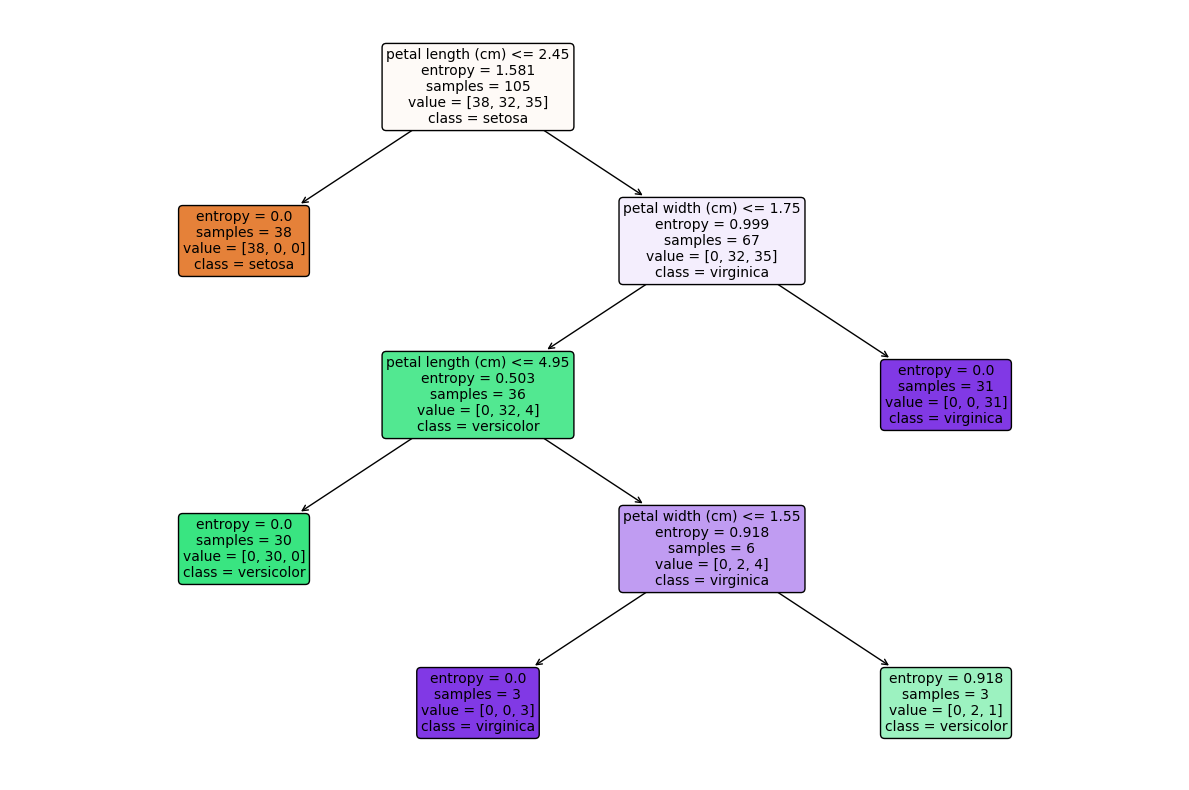

In [57]:
features = list(X_train.columns)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# inline display
plt.figure(figsize=(12,8))
plot_tree(iristree1,
          feature_names=features,
          class_names=iristree1.classes_,
          filled=True, rounded=True, fontsize=10)
plt.tight_layout()
plt.show()

# optional: save to PNG file
plt.figure(figsize=(12,8))
plot_tree(iristree1,
          feature_names=features,
          class_names=iristree1.classes_,
          filled=True, rounded=True, fontsize=10)
plt.tight_layout()
plt.savefig('iristree1.png', dpi=300)
plt.close()


In [58]:
# tree with max_depth = 3
iristree2 = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=3, 
                                  min_samples_leaf=4,
                                  min_samples_split=4)
iristree2.fit(X_train, y_train)

# score
print(iristree2.score(X_test,y_test))

0.9555555555555556


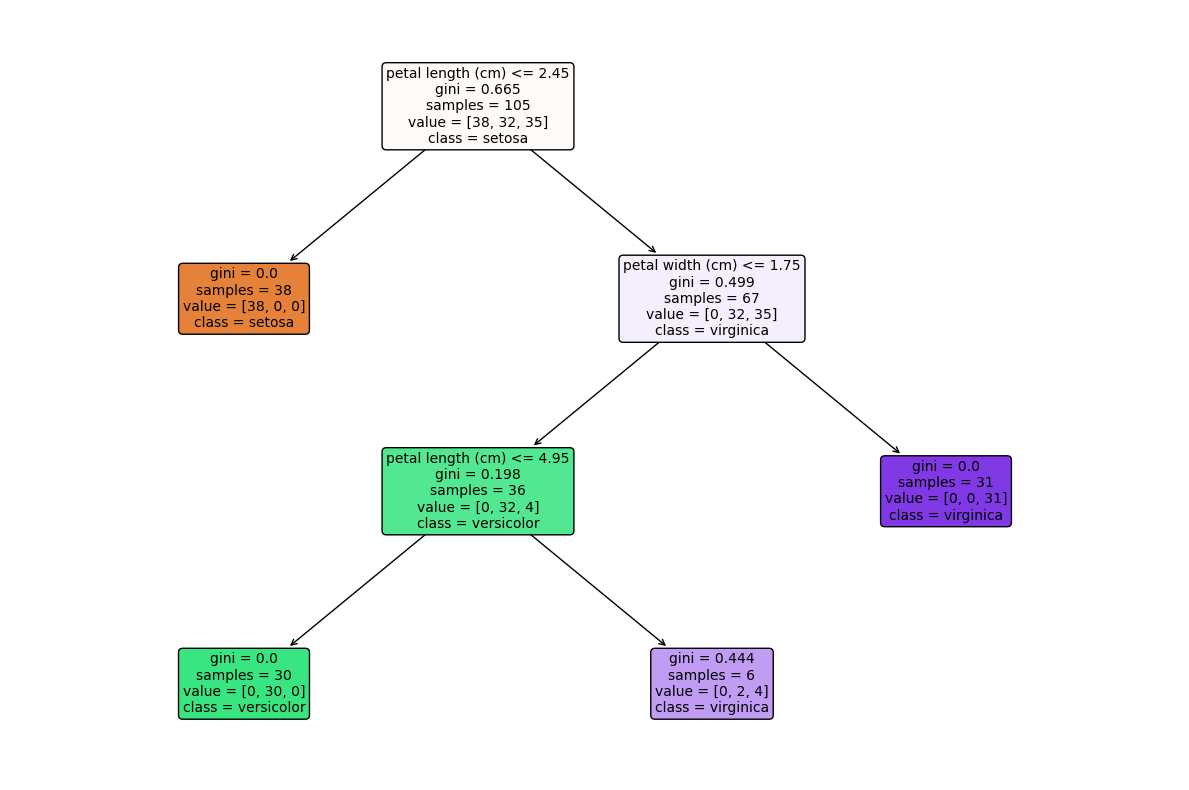

In [59]:

# plotting tree with max_depth=3 (no Graphviz / pydotplus required)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

features = list(X_train.columns)

plt.figure(figsize=(12,8))
plot_tree(iristree2,
          feature_names=features,
          class_names=iristree2.classes_,
          filled=True, rounded=True, fontsize=10)
plt.tight_layout()
plt.show()

# optional: save to PNG
plt.figure(figsize=(12,8))
plot_tree(iristree2,
          feature_names=features,
          class_names=iristree2.classes_,
          filled=True, rounded=True, fontsize=10)
plt.tight_layout()
plt.savefig('iristree2.png', dpi=300)
plt.close()


In [60]:
# Classification Metrix
from sklearn.metrics import classification_report,confusion_matrix
y_pred = iristree1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        18
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [61]:
# Print the Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]
